In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("NCBAPrices.csv", parse_dates = ['Date'])

In [3]:
df.columns.tolist()

['Date', ' Open', ' High', ' Low', ' Close', ' Volume']

In [4]:
df = df.rename(columns = {' Open':'Open', ' High':'High', ' Low':'Low', ' Close':'Close', ' Volume':'Volume'})

In [5]:
df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [6]:
df = df.sort_values(by = 'Date')
df.head()

,Date,Open,High,Low,Close,Volume
1056,2020-01-06,33.91,34.41,33.27,33.91,6.347000e+04
1055,2020-01-07,33.23,33.64,32.27,33.23,2.157100e+05
1054,2020-01-08,32.95,33.41,32.73,32.95,1.299100e+05
1053,2020-01-09,32.95,33.64,32.73,32.95,2.147530e+06
1052,2020-01-10,33.18,33.36,32.73,33.18,1.525700e+06


In [10]:
df.tail()

,Date,Open,High,Low,Close,Volume
4,2024-03-25,42.4,43.0,42.30,42.85,35400.0
3,2024-03-26,43.3,45.0,42.85,44.55,135800.0
2,2024-03-27,46.5,46.5,42.85,43.30,136300.0
1,2024-03-28,44.0,44.5,43.00,43.80,151300.0
0,2024-04-02,45.0,45.0,43.00,43.35,30600.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1057 entries, 1056 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1057 non-null   datetime64[ns]
 1   Open    1057 non-null   float64       
 2   High    1057 non-null   float64       
 3   Low     1057 non-null   float64       
 4   Close   1057 non-null   float64       
 5   Volume  1057 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 57.8 KB


## A lineplot of closing price against year

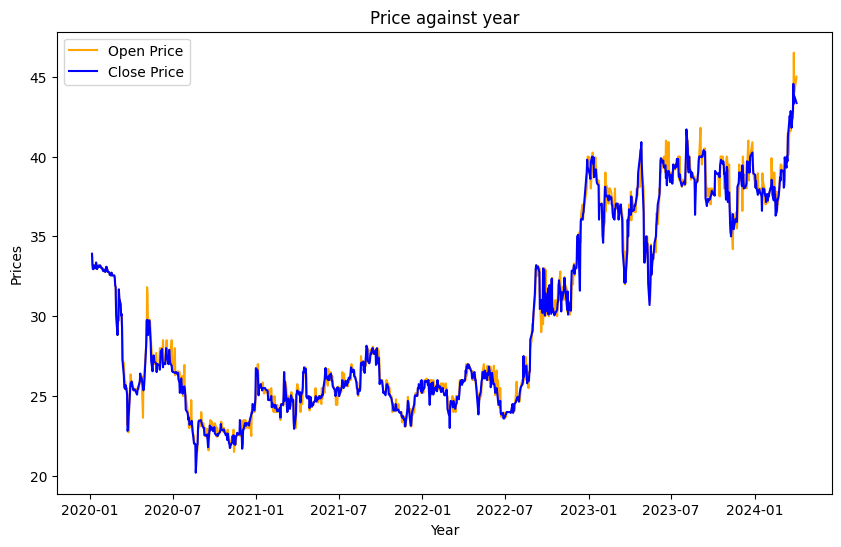

In [11]:
plt.figure(figsize = (10,6))
plt.plot(df['Date'],df['Open'], label = 'Open Price', color = 'Orange')
plt.plot(df['Date'],df['Close'], label = 'Close Price', color = 'Blue')
plt.xlabel("Year")
plt.ylabel("Prices")
plt.title("Price against year")
plt.legend()
plt.show()

## Correlation Heatmap

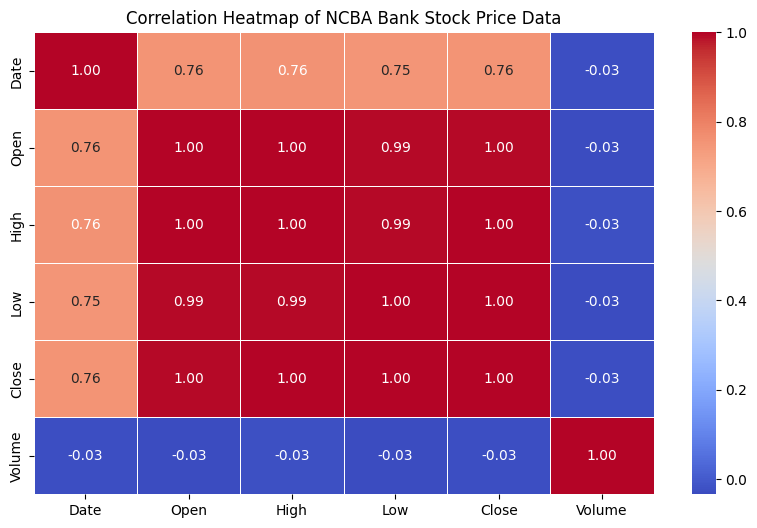

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Heatmap of NCBA Bank Stock Price Data')
plt.show()

## Model Training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

In [15]:
X = df.drop(['Date','Close','Volume'], axis = 1)
y = df['Close']

In [16]:
X

,Open,High,Low
1056,33.91,34.41,33.27
1055,33.23,33.64,32.27
1054,32.95,33.41,32.73
1053,32.95,33.64,32.73
1052,33.18,33.36,32.73
...,...,...,...
4,42.40,43.00,42.30
3,43.30,45.00,42.85
2,46.50,46.50,42.85
1,44.00,44.50,43.00


In [17]:
y

1056    33.91
1055    33.23
1054    32.95
1053    32.95
1052    33.18
        ...  
4       42.85
3       44.55
2       43.30
1       43.80
0       43.35
Name: Close, Length: 1057, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 70)

In [19]:
model = ExtraTreesRegressor(n_estimators = 100, random_state = 70)

In [20]:
model.fit(X_train,y_train)

ExtraTreesRegressor(random_state=70)

In [21]:
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

In [22]:
print("Training R^2 score:",round(train_score*100,2),"%")
print("Testing R^2 score:",round(test_score*100,2),"%")

Training R^2 score: 99.98 %
Testing R^2 score: 99.59 %


In [23]:
y_test

954    27.05
661    26.50
16     39.95
857    22.90
38     38.05
       ...  
373    31.45
127    37.35
515    23.85
88     35.95
627    27.65
Name: Close, Length: 212, dtype: float64

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([27.23025   , 26.502     , 39.5       , 22.8765    , 38.1795    ,
       25.146     , 21.9595    , 36.725     , 25.2908    , 30.53233333,
       34.884     , 36.0585    , 36.354     , 32.7165    , 26.101     ,
       39.5       , 33.0525    , 24.51275   , 25.4625    , 26.2454    ,
       37.2255    , 31.9145    , 31.47      , 25.0919    , 37.301     ,
       37.098     , 33.1509    , 24.1135    , 24.2875    , 25.412     ,
       38.8525    , 39.805     , 24.83516667, 38.5355    , 23.4005    ,
       22.63      , 25.8669    , 37.9825    , 25.4375    , 26.996     ,
       26.87995   , 38.4805    , 38.041     , 22.8518    , 38.28      ,
       24.45      , 38.3535    , 24.98933333, 24.0765    , 26.0135    ,
       30.05      , 36.873     , 25.70095   , 37.82066667, 26.58333333,
       37.5015    , 26.737     , 39.294375  , 38.5935    , 27.05      ,
       24.3335    , 24.925     , 23.9435    , 23.85      , 23.3       ,
       37.0245    , 39.7365    , 38.465     , 32.1995    , 23.41

In [26]:
from sklearn.metrics import mean_squared_error as mse

In [27]:
loss = mse(y_pred,y_test)
loss

0.15692594968913698

In [29]:
print("Model accuracy is:",round(100-loss,2),"%")

Model accuracy is: 99.84 %


In [30]:
import joblib

In [31]:
joblib.dump(model,'ncba_prediction')

['ncba_prediction']